In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#### `Deciding on a primary metric`
As you have seen, several metrics can be useful to evaluate the performance of classification models, including accuracy, precision, recall, and F1-score.

In this exercise, you will be provided with three different classification problems, and your task is to select the problem where __precision__ is best suited as the primary metric.

- A model predicting the presence of cancer as the positive class.

- A classifier predicting the positive class of a computer program containing malware.

- `A model predicting if a customer is a high-value lead for a sales team with limited capacity`. With limited capacity, the sales team needs the model to return the highest proportion of true positives compared to all predicted positives, thus minimizing wasted effort.

### `Assessing a diabetes prediction classifier`
In this chapter you'll work with the __diabetes_df__ dataset introduced previously.

The goal is to predict whether or not each individual is likely to have diabetes based on the features body mass index (__BMI__) and __age__ (in years). Therefore, it is a binary classification problem. A target value of ___0___ indicates that the individual does not have diabetes, while a value of ___1___ indicates that the individual does have diabetes.

__diabetes_df__ has been preloaded for you as a pandas DataFrame and split into X_train, __X_test, y_train, and y_test__. In addition, a __KNeighborsClassifier()__ has been instantiated and assigned to knn.

You will fit the model, make predictions on the test set, then produce a confusion matrix and classification report.

In [3]:
diabetes_df = pd.read_csv('../datasets/diabetes_clean.csv')

X = diabetes_df[['bmi','age']].values
y = diabetes_df['diabetes'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

- Import _confusion_matrix_ and __classification_report__.
- _Fit_ the model to the training data.
- _Predict_ the labels of the _test set_, storing the results as __y_pred__.
- Compute and print the _confusion matrix_ and _classification report_ for the test labels versus the predicted labels.

[[134  16]
 [ 61  20]]


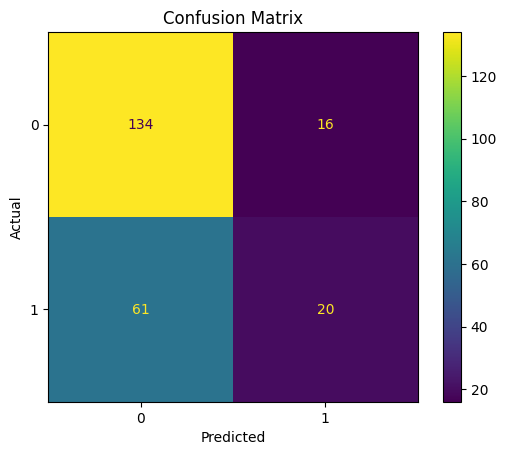

              precision    recall  f1-score   support

           0       0.69      0.89      0.78       150
           1       0.56      0.25      0.34        81

    accuracy                           0.67       231
   macro avg       0.62      0.57      0.56       231
weighted avg       0.64      0.67      0.62       231



In [4]:
#  Import confusion matrix
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_mat, display_labels=knn.classes_)
disp.plot(cmap='viridis')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))

The model produced 34 true positives and 35 false positives, meaning precision was less than 50%, which is confirmed in the classification report. The output also shows a better F1-score for the zero class, which represents individuals who do not have diabetes.

You learned about evaluating machine learning models, focusing on classification problems. Key points included:

- __Accuracy's limitations__: You discovered that accuracy might not always be the best metric, especially in cases of class imbalance, such as in fraud detection scenarios where the majority of transactions are legitimate.

- __Confusion Matrix__: You learned how to create and interpret a confusion matrix, a 2-by-2 matrix that helps visualize the performance of a binary classifier. The matrix includes true positives, true negatives, false positives, and false negatives.

- __Precision and Recall__: Precision (the number of true positives divided by all positive predictions) and recall (the number of true positives divided by the sum of true positives and false negatives) were introduced as crucial metrics. High precision means a lower false positive rate, while high recall indicates a lower false negative rate.

- __F1-Score__: You learned about the F1-score, the harmonic mean of precision and recall, which is particularly useful when you need a balance between precision and recall.

Practical Application: Using scikit-learn's __classification_report__ and __confusion_matrix__, you practiced evaluating a model trained on a diabetes dataset. The exercise involved fitting a KNeighborsClassifier model, making predictions, and then generating a confusion matrix and classification report.

In [5]:
diabet = pd.read_csv('../datasets/diabetes_clean.csv')

X = diabet[['bmi', 'age']].values
y = diabet['diabetes'].values

X_training, X_testing, y_training, y_testing = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors=6)

In [6]:
# Import confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report


# Fit the model, predict, and evaluate
knn.fit(X_training, y_training)
y_predict = knn.predict(X_testing)
print(confusion_matrix(y_testing, y_predict))
print(classification_report(y_testing, y_predict))

[[134  16]
 [ 61  20]]
              precision    recall  f1-score   support

           0       0.69      0.89      0.78       150
           1       0.56      0.25      0.34        81

    accuracy                           0.67       231
   macro avg       0.62      0.57      0.56       231
weighted avg       0.64      0.67      0.62       231



- __Choosing Metrics__: You explored how to decide on the most appropriate metric (precision, recall, F1-score) based on the problem context, emphasizing the importance of understanding the business or application goal to choose the right evaluation metric.

## `Confusion Matrix Explained` 
#### for assessing classification performance

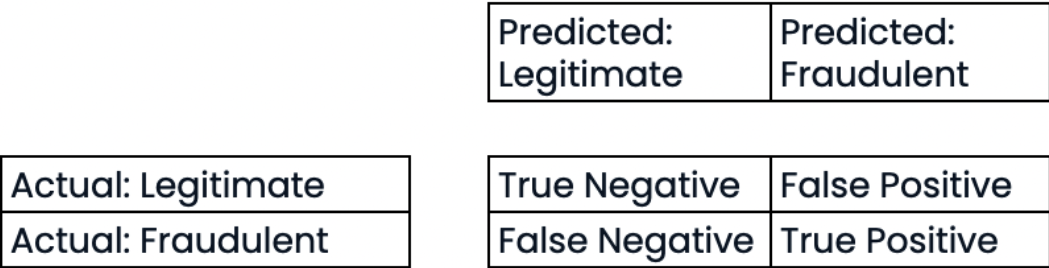

#### example: 
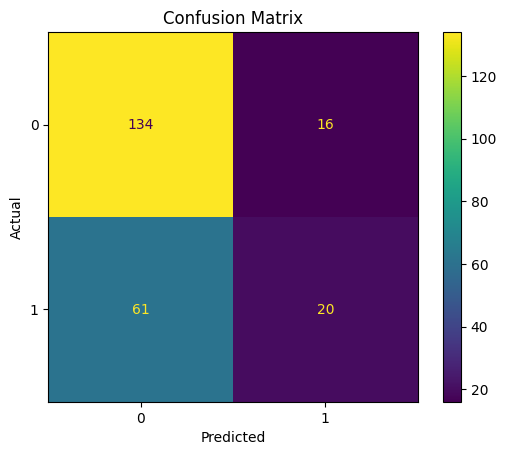

### `Accuracy`
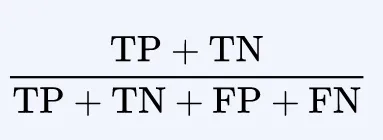
#### = 20 + 134 / 20 + 134 + 16 + 61
#### = 154 / 231 
#### = 0.6666 or 66 % => ^67%

### `Precision`
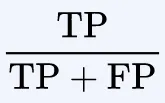
### `1`
#### = 20 / 20 + 16
#### = 20 / 36 
#### = 0.5555 or 55% => ^56%

### `0`
#### = 134 / 134 + 61
#### = 134 / 195 
#### = 0.6871 or 68% => ^69%

### `Recall/Sensitivity`
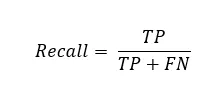
### `1`
#### = 20 / 20 + 61
#### = 20 / 81
#### = 0.2469 or 24% => ^25%

### `0`
#### = 134 / 134 + 16
#### = 134 / 150
#### = 0.8933 or 89%

### `F1 Score`
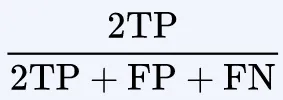
### `0`
#### = 2 * 134 / 2 * 134 + 61 + 16
#### = 268 / 345
#### = 0.7768 or 77% => ^78%

### `1`
#### = 2 * 20 / 2 * 20 + 16 + 61
#### = 40 / 117
#### = 0.3418 or 34%

#### `Building a logistic regression model`
In this exercise, you will build a logistic regression model using all features in the __diabetes_df__ dataset. The model will be used to predict the probability of individuals in the test set having a diabetes diagnosis.

The __diabetes_df__ dataset has been split into X_train, X_test, y_train, and y_test, and preloaded for you.

In [7]:
diabet = pd.read_csv('../datasets/diabetes_clean.csv')

X = diabet[['bmi', 'age']].values
y = diabet['diabetes'].values

X_training, X_testing, y_training, y_testing = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

- Import __LogisticRegression__.
- Instantiate a logistic regression model, __logreg__.
- _Fit_ the model to the training data.
- Predict the probabilities of each individual in the test set having a diabetes diagnosis, storing the array of positive probabilities as __y_pred_probs__.

In [8]:
#  Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_training, y_training)

y_predict = logreg.predict(X_test)
# Predict probabilities
y_pred_probs = logreg.predict_proba(X_testing)[:, 1]

print(y_pred_probs[:10])

[0.25205435 0.30805034 0.61058576 0.50718353 0.69934247 0.1169024
 0.42813302 0.13818001 0.15706071 0.5323531 ]


[[130  20]
 [ 55  26]]
              precision    recall  f1-score   support

           0       0.70      0.87      0.78       150
           1       0.57      0.32      0.41        81

    accuracy                           0.68       231
   macro avg       0.63      0.59      0.59       231
weighted avg       0.65      0.68      0.65       231



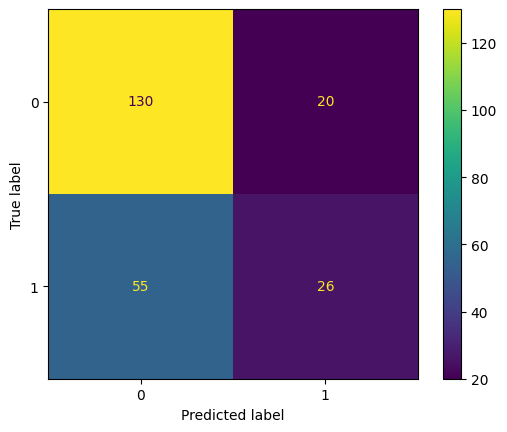

In [9]:
conf = confusion_matrix(y_testing, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=knn.classes_)
disp.plot()
print(confusion_matrix(y_testing, y_predict))
print(classification_report(y_testing, y_predict))


Notice how the probability of a diabetes diagnosis for the first 10 individuals in the test set ranges from 0.01 to 0.79. Now let's plot the ROC curve to visualize performance using different thresholds.

## `ROC curve`
#### Probability thresholds for Binary Classifier

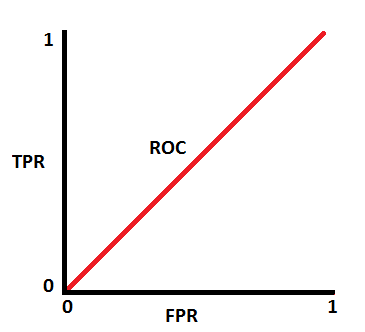


TPR = TP/TP+FN
- TPR = 26 / 26 + 55
- TPR = 0.3209

FPR = FP/FP+TN
- FPR = 20 / 20 + 130
- FPR = 0.1333 

AUC => Area Under Curve
AUC = 

#### `The ROC curve`
Now you have built a logistic regression model for predicting diabetes status, you can plot the ROC curve to visualize how the true positive rate and false positive rate vary as the decision threshold changes.

The test labels, __y_test__, and the predicted probabilities of the test features belonging to the positive class, __y_pred_probs__, have been preloaded for you, along with matplotlib.pyplot as plt.

You will create a ROC curve and then interpret the results.

- Import __roc_curve__.
- Calculate the _ROC curve_ values, using __y_test__ and __y_pred_probs__, and - unpacking the results into ___fpr___, ___tpr___, and ___thresholds___.
- Plot t_rue positive_ rate against _false positive_ rate.

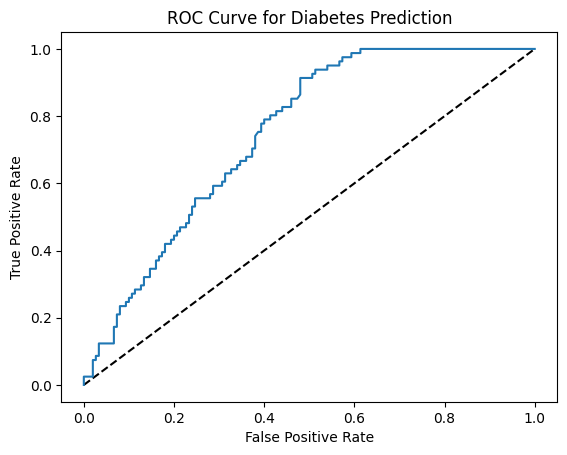

In [10]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_testing, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

#### `Question`
But, what does the plot tell you about the model's performance?

- The model is about as good as randomly guessing the class of each observation.

- The model is much worse than randomly guessing the class of each observation.

- `The model is much better than randomly guessing the class of each observation.`  The ROC curve is above the dotted line, so the model performs better than randomly guessing the class of each observation.

- It is not possible to conclude whether the model performs better or worse than randomly guessing the class of each observation.

#### `ROC AUC`
The ROC curve you plotted in the last exercise looked promising.

Now you will compute the area under the ROC curve, along with the other classification metrics you have used previously.

The __confusion_matrix__ and __classification_report__ functions have been preloaded for you, along with the logreg model you previously built, plus __X_train, X_test, y_train, y_test.__ Also, the model's predicted test set labels are stored as __y_pred__, and probabilities of test set observations belonging to the positive class stored as __y_pred_probs__.

A __knn__ model has also been created and the _performance metrics_ printed in the console, so you can compare the __roc_auc_score__, __confusion_matrix__, and __classification_report__ between the two models.

In [11]:
diabetes = pd.read_csv('../datasets/diabetes_clean.csv')

X_knn = diabetes[['bmi', 'age']].values
y_knn = diabetes['diabetes'].values

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(
    X_knn, y_knn, test_size=0.3, random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train_knn, y_train_knn)

y_pred_knn = knn.predict(X_test_knn)
y_pred_probs_knn = knn.predict_proba(X_test_knn)[:, 1]


- Import __roc_auc_score__.
- Calculate and print the _ROC AUC score_, passing the test labels and the predicted positive class probabilities.
- Calculate and print the confusion matrix.
- Call __classification_report()__.

In [12]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test_knn, y_pred_probs_knn))

# Calculate the confusion matrix
print(confusion_matrix(y_test_knn, y_pred_knn))

# Calculate the classification report
print(classification_report(y_test_knn, y_pred_knn))

0.7308230452674896
[[134  16]
 [ 61  20]]
              precision    recall  f1-score   support

           0       0.69      0.89      0.78       150
           1       0.56      0.25      0.34        81

    accuracy                           0.67       231
   macro avg       0.62      0.57      0.56       231
weighted avg       0.64      0.67      0.62       231



You learned about evaluating machine learning models, focusing on logistic regression for classification tasks. Logistic regression, despite its name, is used to classify observations into binary classes by calculating the probability that an observation belongs to a certain class. For instance, using a diabetes dataset, logistic regression can predict whether individuals are more likely to have diabetes based on a probability threshold, typically set at 0.5.

Key points covered include:

- __Logistic Regression Basics__: You discovered how logistic regression works, using the probability of an event (e.g., having diabetes) to classify observations. You learned to implement logistic regression in scikit-learn, involving importing the model, fitting it to the training data, and predicting probabilities for the test set.
- __ROC Curve and AUC__: The lesson introduced the Receiver Operating Characteristic (__ROC__) curve as a tool to visualize the trade-off between true positive and false positive rates at various threshold settings. You learned how to plot the _ROC curve_ and calculate the Area Under the Curve (__AUC__) to quantify model performance, with an __AUC__ of 1 representing a perfect model and ___0.5___ a model no better than random guessing.

Practical exercises reinforced these concepts:
- You built a logistic regression model using the __diabetes_df__ dataset, predicting the probability of diabetes in the test set. The process involved importing __LogisticRegression__ from sklearn.linear_model, fitting the model, and using the .__predict_proba()__ method to get _probabilities_.
- You plotted the __ROC curve__ and calculated the AUC score to evaluate your model's performance, comparing it against other classification metrics like the confusion matrix and classification report.


In [13]:
# Example of predicting probabilities
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_probs_examples_recent_learn = logreg.predict_proba(X_test)[:, 1]

This lesson equipped you with essential tools for model evaluation, particularly useful for classification tasks in machine learning

#### `Hyperparameter tuning with GridSearchCV`
Now you have seen how to perform grid search hyperparameter tuning, you are going to build a lasso regression model with optimal hyperparameters to predict blood glucose levels using the features in the __diabetes_df__ dataset.

X_train, X_test, y_train, and y_test have been preloaded for you. A __KFold()__ object has been created and stored for you as __kf__, along with a _lasso regression_ model as __lasso__.

##### `Exploring the GridSearchCV Class`
- GridSearchCV(
    - estimator=,     # A sklearn model
    - param_grid=,    # A dictionary of parameter names and values
    - cv=,            # An integer that represents the number of k-folds
    - scoring=,       # The performance measure (such as r2, precision)
    - n_jobs=,        # The number of jobs to run in parallel
    - verbose=        # Verbosity (0-3, with higher being more)
)

In [20]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso


In [15]:
diabetes = pd.read_csv('../datasets/diabetes_clean.csv')

X_lasso_reg = diabetes[['bmi', 'age']].values
y_lasso_reg = diabetes['diabetes'].values

X_train_lasso_reg, X_test_lasso_reg, y_train_lasso_reg, y_test_lasso_reg = train_test_split(
    X_lasso_reg, y_lasso_reg, test_size=0.3, random_state=42, stratify=y)

- Import __GridSearchCV__.
- Set up a parameter grid for "___alpha___", using __np.linspace()__ to create ___20___ evenly spaced values ranging from ___0.00001___ to ___1___.
- Call __GridSearchCV()__, passing __lasso__, the parameter grid, and setting __cv__ equal to __kf__.
- Fit the grid search object to the training data to perform a cross-validated grid search.


In [16]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
lasso = Lasso()

#  Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train_lasso_reg, y_train_lasso_reg)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': 1e-05}
Tuned lasso score: 0.104802302073562


Unfortunately, the best model only has an R-squared score of 0.33, highlighting that using the optimal hyperparameters does not guarantee a high performing model!

#### `Hyperparameter tuning with RandomizedSearchCV`
As you saw, __GridSearchCV__ can be computationally expensive, especially if you are searching over a large hyperparameter space. In this case, you can use __RandomizedSearchCV__, which tests a fixed number of hyperparameter settings from specified probability distributions.

Training and test sets from diabetes_df have been pre-loaded for you as X_train. X_test, y_train, and y_test, where the target is "diabetes". A logistic regression model has been created and stored as __logreg__, as well as a __KFold__ variable stored as __kf__.

You will define a range of hyperparameters and use __RandomizedSearchCV__, which has been imported from sklearn.model_selection, to look for optimal hyperparameters from these options.

In [17]:
from sklearn.model_selection import RandomizedSearchCV



- Create params, adding "___l1___" and "___l2___" as penalty values, setting ___C___ to a range of 50 float values between ___0.1___ and ___1.0___, and __class_weight__ to either "__balanced__" or a dictionary containing ___0:0.8___, ___1:0.2___.
- Create the Randomized Search CV object, passing the model and the parameters, and setting __cv__ equal to __kf__.
- Fit __logreg_cv__ to the training data.
- Print the model's best _parameters_ and _accuracy score_.

In [22]:
diabetes = pd.read_csv('../datasets/diabetes_clean.csv')

X_lasso_reg_RSCV = diabetes[['bmi', 'age']].values
y_lasso_reg_RSCV = diabetes['diabetes'].values

X_train_lasso_reg_RSCV, X_test_lasso_reg_RSCV, y_train_lasso_reg_RSCV, y_test_lasso_reg_RSCV = train_test_split(
    X_lasso_reg_RSCV, y_lasso_reg_RSCV, test_size=0.3, random_state=42, stratify=y)

logreg_RSCV = LogisticRegression()

kf_RSCV = KFold(n_splits=5, shuffle=True, random_state=42)

In [24]:
#  Create the parameter space
params = {"penalty": ["l1", "l2"],
          "tol": np.linspace(0.0001, 1.0, 50),
          "C": np.linspace(0.1, 1.0, 50),
          "class_weight": ["balanced", {0: 0.8, 1: 0.2}],
          "solver": ["liblinear", "saga"]}

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg_RSCV, params, cv=kf_RSCV)

# Fit the data to the model
logreg_cv.fit(X_train_lasso_reg_RSCV, y_train_lasso_reg_RSCV)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'tol': 0.34700408163265306, 'solver': 'saga', 'penalty': 'l2', 'class_weight': {0: 0.8, 1: 0.2}, 'C': 0.7244897959183674}
Tuned Logistic Regression Best Accuracy Score: 0.6516614745586707


! Even without exhaustively trying every combination of hyperparameters, the model has an accuracy of over 70% on the test set! So far we have worked with clean datasets; however, in the next chapter, we will discuss the steps required to transform messy data before building supervised learning models.

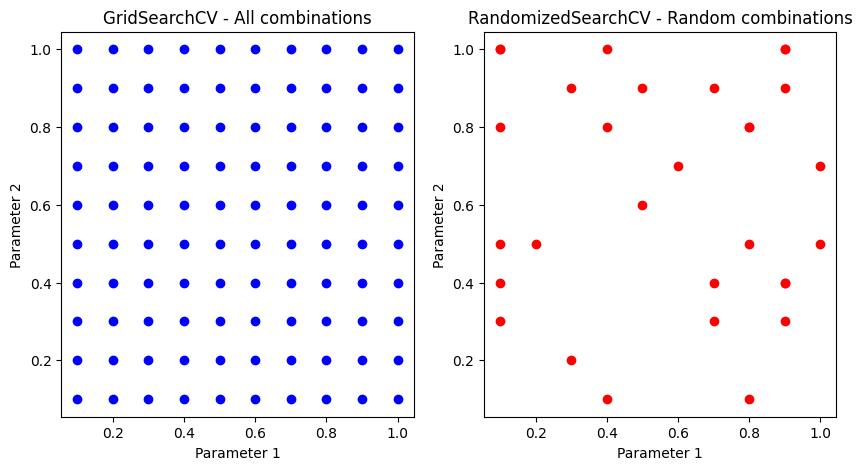

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Membuat plot grid parameter
param1 = np.linspace(0.1, 1, 10)
param2 = np.linspace(0.1, 1, 10)

# Plot GridSearch (semua kombinasi)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for p1 in param1:
    for p2 in param2:
        plt.scatter(p1, p2, color='blue')
plt.title("GridSearchCV - All combinations")
plt.xlabel("Parameter 1")
plt.ylabel("Parameter 2")

# Plot RandomizedSearch (beberapa kombinasi acak)
plt.subplot(1, 2, 2)
for _ in range(30):  # misal 30 kombinasi acak
    p1 = np.random.choice(param1)
    p2 = np.random.choice(param2)
    plt.scatter(p1, p2, color='red')
plt.title("RandomizedSearchCV - Random combinations")
plt.xlabel("Parameter 1")
plt.ylabel("Parameter 2")

plt.show()